<a href="https://colab.research.google.com/github/Kinadim/ML_projet/blob/main/ML_PROJET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

# 1.Analyse des données

In [10]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [11]:
import pandas as pd

#attention le séparateur est une tabulation
df=pd.read_csv('scitweets_export.tsv', sep='\t')
display (df.head())


,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


In [12]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1140 non-null   int64  
 1   tweet_id              1140 non-null   int64  
 2   text                  1140 non-null   object 
 3   science_related       1140 non-null   int64  
 4   scientific_claim      1140 non-null   float64
 5   scientific_reference  1140 non-null   float64
 6   scientific_context    1140 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 62.5+ KB


None

In [13]:
df.describe()

,Unnamed: 0,tweet_id,science_related,scientific_claim,scientific_reference,scientific_context
count,1140.000000,1.140000e+03,1140.000000,1140.000000,1140.00000,1140.000000
mean,626.040351,8.560901e+17,0.328947,0.230702,0.17807,0.220175
std,364.412255,2.865422e+17,0.470037,0.421467,0.38274,0.414547
min,0.000000,3.166700e+17,0.000000,0.000000,0.00000,0.000000
25%,306.750000,6.176042e+17,0.000000,0.000000,0.00000,0.000000
50%,624.500000,8.615253e+17,0.000000,0.000000,0.00000,0.000000
75%,940.250000,1.103864e+18,1.000000,0.000000,0.00000,0.000000
max,1260.000000,1.344485e+18,1.000000,1.000000,1.00000,1.000000


### On observe la répartition des valeurs pour chaque colonne" 

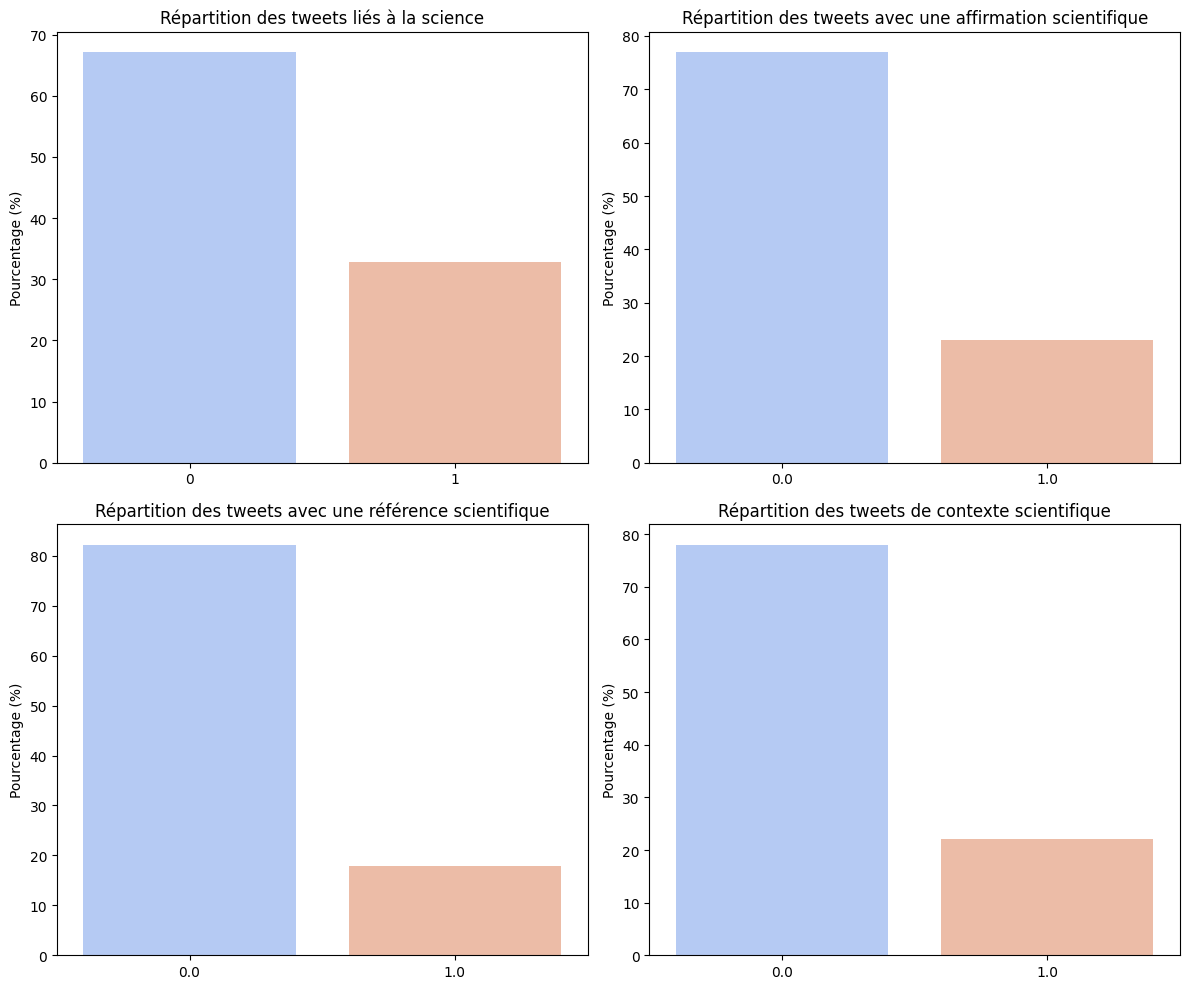

In [14]:
# Définir la figure avec 2 lignes et 2 colonnes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Liste des colonnes à afficher
columns = ['science_related', 'scientific_claim', 'scientific_reference', 'scientific_context']
titles = [
    "Répartition des tweets liés à la science",
    "Répartition des tweets avec une affirmation scientifique",
    "Répartition des tweets avec une référence scientifique",
    "Répartition des tweets de contexte scientifique"
]

# Générer les 4 countplots avec pourcentage
for ax, col, title in zip(axes.flat, columns, titles):
    total = len(df[col])  # Nombre total d'observations
    sns.barplot(
        x=df[col].value_counts(normalize=True).index,  # Valeurs uniques
        y=df[col].value_counts(normalize=True).values * 100,  # Pourcentage
        ax=ax, palette="coolwarm"
    )
    ax.set_title(title)
    ax.set_xlabel("")  # Supprimer les labels des axes X pour plus de lisibilité
    ax.set_ylabel("Pourcentage (%)")

# Ajuster l'espacement
plt.tight_layout()
plt.show()


On remarque que la majorité des tweets de notre dataset d'entrainement ne sont pas scienfifiques

### On regarde la densité de valeur présente

In [15]:
sns.kdeplot(data=df_numerique, fill=True)
plt.show()

NameError: name 'df_numerique' is not defined

# 2. Nettoyage des données

In [ ]:
import itertools
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Télécharger les ressources nécessaires
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Charger les données

# Définition des fonctions de prétraitement
def remove_links(tweet):
    return re.sub(r'http\S+|www\S+|https\S+|\@\w+|\#', '', tweet, flags=re.MULTILINE)

def remove_mentions(tweet):
    return re.sub(r'\@\w+', '', tweet, flags=re.MULTILINE)

def remove_hashtags(tweet):
    return re.sub(r'\#+', '', tweet, flags=re.MULTILINE)

def to_lowercase(tweet):
    return tweet.lower()

def remove_punctuation(tweet):
    return re.sub(r'[^\w\s]', '', tweet)

def remove_stopwords(tweet):
    tokens = word_tokenize(tweet)
    return ' '.join([word for word in tokens if word not in stopwords.words('english')])

def lemmatize_words(tweet):
    tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens])

# Liste des transformations possibles
transformations = {
    "remove_links": remove_links,
    "to_lowercase": to_lowercase,
    "remove_punctuation": remove_punctuation,
    "remove_stopwords": remove_stopwords,
    "lemmatize_words": lemmatize_words,
    "remove_mentions": remove_mentions,
    "remove_hashtags": remove_hashtags
}

# Générer toutes les combinaisons possibles des transformations
all_combinations = []
for i in range(1, len(transformations) + 1):
    all_combinations.extend(itertools.combinations(transformations.keys(), i))

# Stocker les résultats
results = []

# Boucle sur chaque combinaison de transformations
for i, combination in enumerate(all_combinations):
    df_copy = df.copy()
    
    # Appliquer les transformations sélectionnées
    for transform in combination:
        df_copy['text'] = df_copy['text'].apply(transformations[transform])
    
    # Séparation des données
    X = df_copy['text']
    y = df_copy['science_related']
    
    # Vectorisation simple avec TF-IDF
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer()
    X_vectorized = vectorizer.fit_transform(X)

    # Séparation en train/test
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

    # Modèle Decision Tree
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Évaluation
    accuracy = accuracy_score(y_test, y_pred)
    
    # Stocker les résultats
    results.append({"combination": combination, "accuracy": accuracy})
    print(f"Test {i+1}/{len(all_combinations)} - {combination} -> Accuracy: {accuracy:.4f}")

# Afficher les meilleurs résultats
results_df = pd.DataFrame(results)
best_results = results_df.sort_values(by="accuracy", ascending=False).head(5)
print("\nTop 5 des meilleures combinaisons :")
print(best_results)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/clementwt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/clementwt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/clementwt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Test 1/31 - ('remove_links_mentions_hashtags',) -> Accuracy: 0.7632
Test 2/31 - ('to_lowercase',) -> Accuracy: 0.7851
Test 3/31 - ('remove_punctuation',) -> Accuracy: 0.7237
Test 4/31 - ('remove_stopwords',) -> Accuracy: 0.7763
Test 5/31 - ('lemmatize_words',) -> Accuracy: 0.7149
Test 6/31 - ('remove_links_mentions_hashtags', 'to_lowercase') -> Accuracy: 0.7237
Test 7/31 - ('remove_links_mentions_hashtags', 'remove_punctuation') -> Accuracy: 0.7719
Test 8/31 - ('remove_links_mentions_hashtags', 'remove_stopwords') -> Accuracy: 0.7851
Test 9/31 - ('remove_links_mentions_hashtags', 'lemmatize_words') -> Accuracy: 0.7281
Test 10/31 - ('to_lowercase', 'remove_punctuation') -> Accuracy: 0.7719
Test 11/31 - ('to_lowercase', 'remove_stopwords') -> Accuracy: 0.7500
Test 12/31 - ('to_lowercase', 'lemmatize_words') -> Accuracy: 0.7412
Test 13/31 - ('remove_punctuation', 'remove_stopwords') -> Accuracy: 0.7675
Test 14/31 - ('remove_punctuation', 'lemmatize_words') -> Accuracy: 0.7105
Test 15/31 -

On a remarqué que certains tweets utilisant des mots qui n'était pas en anglais. Nous avons donc trouvé pour qu'un modèle fonctionne, il parait approprié de traduire les tweets en anglais. Pour cela nous allons utiliser les fonctionnalité de traduction proposé par Google. 

### Fonction pour traduire en anglais

In [22]:
!pip install deep-translator
from deep_translator import GoogleTranslator

def translate_to_english(tweet):
    translated = GoogleTranslator(source='auto', target='en').translate(tweet)
    return translated

Defaulting to user installation because normal site-packages is not writeable


In [23]:
df['text'] = df['text'].apply(translate_to_english)
display(df)


,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knee bit sore guess thats sign recent treadmil...,0,0.0,0.0,0.0
1,1,319090866545385472,mcdonalds breakfast stop gym,0,0.0,0.0,0.0
2,2,322030931022065664,gynecologist cancer experience explain danger ...,1,1.0,0.0,0.0
3,3,322694830620807168,couchlock high lead sleeping couch got ta stop...,1,1.0,0.0,0.0
4,4,328524426658328576,daily routine help prevent problem bipolar dis...,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...
1135,1255,1340455669443350528,im sorry million dead covid total death u actu...,1,1.0,0.0,0.0
1136,1256,1340689510569549824,dear nin applicant kindly download enrolment f...,0,0.0,0.0,0.0
1137,1258,1341155832793165825,whats uber support team email address,0,0.0,0.0,0.0
1138,1259,1344167355648241664,house pass bill increase stimulus check,0,0.0,0.0,0.0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Transformation du texte en vecteurs TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limite à 5000 mots pour éviter la surcharge
X = vectorizer.fit_transform(df['text'])

# Définition de la variable cible
y = df['science_related']

# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédiction sur les données test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       146
           1       0.70      0.76      0.73        82

    accuracy                           0.79       228
   macro avg       0.78      0.79      0.78       228
weighted avg       0.80      0.79      0.80       228



In [27]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage simple
print("Matrice de confusion :")
print(cm)

# Explication des valeurs
tn, fp, fn, tp = cm.ravel()
print(f"\nVrais Négatifs  (TN) : {tn}")
print(f"Faux Positifs  (FP) : {fp}")
print(f"Faux Négatifs  (FN) : {fn}")
print(f"Vrais Positifs  (TP) : {tp}")

Matrice de confusion :
[[119  27]
 [ 20  62]]

Vrais Négatifs  (TN) : 119
Faux Positifs  (FP) : 27
Faux Négatifs  (FN) : 20
Vrais Positifs  (TP) : 62


Beaucoup de TP & TN → Modèle performant-> valeurs réelles bien guess
Beaucoup de FP → Modèle fait trop d'erreurs en classant des tweets non scientifiques comme scientifiques
Beaucoup de FN → Modèle rate des tweets scientifiques